In [308]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set(rc={'figure.figsize': (11, 8)})

In [305]:
class SGDRegressor(BaseEstimator):

    def __init__(self, eta=10**-3, n_iter=10, quiet=False):
        self.error_ = []
        self.weights_ = []
        self.params = {}
        self.params['eta'] = eta
        self.params['n_iter'] = n_iter
        self.params['quiet'] = quiet
        super(SGDRegressor, self).set_params(**self.params)
    
    def fit(self, X, y):
        self.w = [0] * (len(X[0]) + 1)
        
        for epoch in range(self.params['n_iter']):
            for i in range(len(y)):
                y_pred = self.predict([X[i]])[0]
                error = y_pred - y[i]

                self.w[0] = self.w[0] - self.params['eta'] * error
                for j in range(len(X[i])):
                    self.w[j+1] = self.w[j+1] - self.params['eta'] * error * X[i][j]
                se = (error**2)/2

                self.error_.append(se)
                self.weights_.append(self.w.copy())
    
                if not self.params['quiet']:
                    out = f'>epoch={epoch}, iter={i}, se={se:.6f}'
                    for i in range(len(self.w)):
                        out += f', w{i}={self.w[i]:.6f}'
                    print(out)
                  
        return self

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            pred = self.w[0]
            for j in range(len(X[i])):
                pred += self.w[j+1]*X[i][j]
            y_pred.append(pred)
        return y_pred

In [302]:
sgd = SGDRegressor(n_iter=10)

# XOR dataset
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([1, 1, 0, 0])

sgd.fit(X, y)

>epoch=0, iter=0, error=0.500000, w0=0.001000, w1=0.000000, w2=0.001000
>epoch=0, iter=1, error=0.499001, w0=0.001999, w1=0.000999, w2=0.001000
>epoch=0, iter=2, error=0.000008, w0=0.001995, w1=0.000995, w2=0.000996
>epoch=0, iter=3, error=0.000002, w0=0.001993, w1=0.000995, w2=0.000996
>epoch=1, iter=0, error=0.497015, w0=0.002990, w1=0.000995, w2=0.001993
>epoch=1, iter=1, error=0.496023, w0=0.003986, w1=0.001991, w2=0.001993
>epoch=1, iter=2, error=0.000032, w0=0.003978, w1=0.001983, w2=0.001985
>epoch=1, iter=3, error=0.000008, w0=0.003974, w1=0.001983, w2=0.001985
>epoch=2, iter=0, error=0.494059, w0=0.004968, w1=0.001983, w2=0.002979
>epoch=2, iter=1, error=0.493073, w0=0.005961, w1=0.002976, w2=0.002979
>epoch=2, iter=2, error=0.000071, w0=0.005949, w1=0.002964, w2=0.002967
>epoch=2, iter=3, error=0.000018, w0=0.005943, w1=0.002964, w2=0.002967
>epoch=3, iter=0, error=0.491129, w0=0.006934, w1=0.002964, w2=0.003958
>epoch=3, iter=1, error=0.490150, w0=0.007924, w1=0.003954, w2=0

SGDRegressor(eta=0.001, n_iter=10, quiet=False)

In [26]:
data_demo = pd.read_csv('../data/weights_heights.csv')

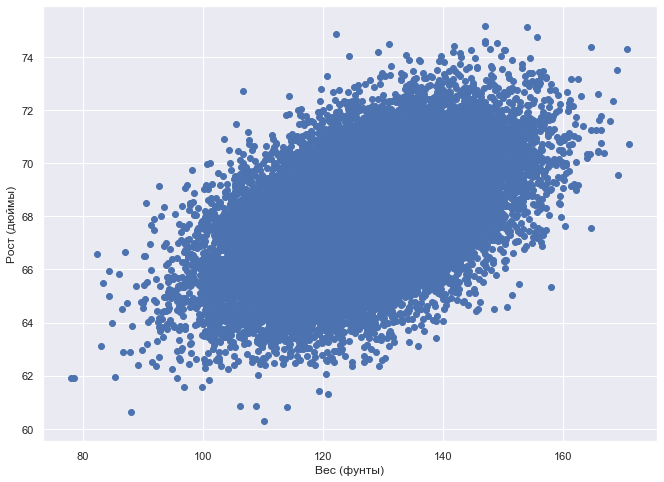

In [311]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Вес (фунты)')
plt.ylabel('Рост (дюймы)');

In [316]:
X, y = data_demo['Weight'].values, data_demo['Height'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [306]:
sgd = SGDRegressor(quiet=False)
#sgd = SGDRegressor(eta=10**-4, quiet=True)
sgd.fit(X_train_scaled[:300], y_train[:300])
mean_squared_error(y_valid, sgd.predict(X_valid_scaled))

>epoch=0, iter=0, error=4765.737338, w0=0.069034, w1=-0.041624
>epoch=0, iter=1, error=4103.575036, w0=0.133093, w1=-0.130044
>epoch=0, iter=2, error=4917.868643, w0=0.203221, w1=-0.103512
>epoch=0, iter=3, error=4673.977201, w0=0.271587, w1=-0.158706
>epoch=0, iter=4, error=4641.111445, w0=0.339713, w1=-0.112157
>epoch=0, iter=5, error=4373.334310, w0=0.405844, w1=-0.237988
>epoch=0, iter=6, error=5122.022822, w0=0.477413, w1=-0.163673
>epoch=0, iter=7, error=4785.145683, w0=0.546587, w1=-0.144679
>epoch=0, iter=8, error=4523.102722, w0=0.613841, w1=-0.114174
>epoch=0, iter=9, error=4755.569037, w0=0.682802, w1=-0.223585
>epoch=0, iter=10, error=4498.341082, w0=0.749872, w1=-0.204679
>epoch=0, iter=11, error=5015.620727, w0=0.820693, w1=-0.168614
>epoch=0, iter=12, error=4195.799817, w0=0.885468, w1=-0.246066
>epoch=0, iter=13, error=4772.704657, w0=0.954553, w1=-0.190695
>epoch=0, iter=14, error=4704.920878, w0=1.023145, w1=-0.136917
>epoch=0, iter=15, error=4532.243067, w0=1.090467,

>epoch=0, iter=127, error=3185.013285, w0=8.181963, w1=-0.399886
>epoch=0, iter=128, error=3331.801594, w0=8.239685, w1=-0.461445
>epoch=0, iter=129, error=3772.952014, w0=8.301109, w1=-0.442638
>epoch=0, iter=130, error=3339.036596, w0=8.358894, w1=-0.559274
>epoch=0, iter=131, error=3557.887968, w0=8.418542, w1=-0.592577
>epoch=0, iter=132, error=3499.787615, w0=8.477701, w1=-0.646057
>epoch=0, iter=133, error=3436.038104, w0=8.536319, w1=-0.650171
>epoch=0, iter=134, error=3456.766002, w0=8.595113, w1=-0.670833
>epoch=0, iter=135, error=3672.848778, w0=8.655717, w1=-0.634777
>epoch=0, iter=136, error=3755.602795, w0=8.717000, w1=-0.605819
>epoch=0, iter=137, error=3148.603387, w0=8.773112, w1=-0.670209
>epoch=0, iter=138, error=3570.989482, w0=8.832870, w1=-0.687946
>epoch=0, iter=139, error=3383.397045, w0=8.891037, w1=-0.680149
>epoch=0, iter=140, error=4028.158661, w0=8.954505, w1=-0.555909
>epoch=0, iter=141, error=3553.711295, w0=9.014118, w1=-0.521595
>epoch=0, iter=142, error

>epoch=0, iter=252, error=3048.744608, w0=15.205202, w1=0.920964
>epoch=0, iter=253, error=2601.104257, w0=15.256203, w1=0.906316
>epoch=0, iter=254, error=2837.369188, w0=15.309470, w1=0.860744
>epoch=0, iter=255, error=2940.133179, w0=15.363693, w1=0.941076
>epoch=0, iter=256, error=2882.398954, w0=15.417381, w1=0.996925
>epoch=0, iter=257, error=2796.127921, w0=15.470259, w1=1.057269
>epoch=0, iter=258, error=2828.368039, w0=15.523442, w1=1.034077
>epoch=0, iter=259, error=2949.732216, w0=15.577753, w1=0.988460
>epoch=0, iter=260, error=3045.310498, w0=15.632937, w1=1.024784
>epoch=0, iter=261, error=2690.061693, w0=15.684803, w1=1.063366
>epoch=0, iter=262, error=2865.688839, w0=15.738335, w1=0.995643
>epoch=0, iter=263, error=2547.881576, w0=15.788812, w1=1.019328
>epoch=0, iter=264, error=3105.655175, w0=15.844540, w1=0.971940
>epoch=0, iter=265, error=2823.223755, w0=15.897674, w1=1.005205
>epoch=0, iter=266, error=2855.597836, w0=15.951112, w1=0.981362
>epoch=0, iter=267, error

>epoch=1, iter=79, error=1997.001977, w0=21.533018, w1=-0.103788
>epoch=1, iter=80, error=2009.038226, w0=21.577840, w1=-0.178334
>epoch=1, iter=81, error=2091.316750, w0=21.623571, w1=-0.171614
>epoch=1, iter=82, error=1898.309454, w0=21.667141, w1=-0.239717
>epoch=1, iter=83, error=2302.973265, w0=21.715130, w1=-0.199681
>epoch=1, iter=84, error=2304.648856, w0=21.763137, w1=-0.167004
>epoch=1, iter=85, error=2280.687752, w0=21.810893, w1=-0.190423
>epoch=1, iter=86, error=1966.237101, w0=21.855236, w1=-0.198768
>epoch=1, iter=87, error=1892.076750, w0=21.898734, w1=-0.214068
>epoch=1, iter=88, error=2105.366480, w0=21.944618, w1=-0.208446
>epoch=1, iter=89, error=2100.348436, w0=21.990448, w1=-0.240389
>epoch=1, iter=90, error=2416.862026, w0=22.039609, w1=-0.145894
>epoch=1, iter=91, error=1923.509443, w0=22.083467, w1=-0.240398
>epoch=1, iter=92, error=2339.308640, w0=22.131833, w1=-0.252317
>epoch=1, iter=93, error=1943.553505, w0=22.175919, w1=-0.235819
>epoch=1, iter=94, error=

>epoch=1, iter=204, error=1805.962116, w0=27.006995, w1=0.674964
>epoch=1, iter=205, error=1513.428957, w0=27.045897, w1=0.722297
>epoch=1, iter=206, error=1419.658084, w0=27.083576, w1=0.697311
>epoch=1, iter=207, error=1585.748611, w0=27.123397, w1=0.685196
>epoch=1, iter=208, error=1807.160451, w0=27.165908, w1=0.635916
>epoch=1, iter=209, error=1848.327706, w0=27.208900, w1=0.660911
>epoch=1, iter=210, error=1777.472313, w0=27.251060, w1=0.669272
>epoch=1, iter=211, error=1744.591514, w0=27.292829, w1=0.807633
>epoch=1, iter=212, error=1464.939930, w0=27.331103, w1=0.846058
>epoch=1, iter=213, error=1609.904190, w0=27.371227, w1=0.882686
>epoch=1, iter=214, error=1497.743525, w0=27.409927, w1=0.915894
>epoch=1, iter=215, error=1502.487604, w0=27.448689, w1=0.985512
>epoch=1, iter=216, error=1506.013313, w0=27.487497, w1=0.978720
>epoch=1, iter=217, error=1596.254625, w0=27.527450, w1=1.015536
>epoch=1, iter=218, error=1746.197535, w0=27.569237, w1=1.015808
>epoch=1, iter=219, error

>epoch=2, iter=30, error=1099.317465, w0=31.882995, w1=0.793860
>epoch=2, iter=31, error=1366.785960, w0=31.919965, w1=0.816067
>epoch=2, iter=32, error=1172.327506, w0=31.954204, w1=0.800216
>epoch=2, iter=33, error=1376.234249, w0=31.991302, w1=0.814889
>epoch=2, iter=34, error=1197.220800, w0=32.025902, w1=0.712534
>epoch=2, iter=35, error=1402.725099, w0=32.063355, w1=0.739721
>epoch=2, iter=36, error=1330.336385, w0=32.099829, w1=0.733342
>epoch=2, iter=37, error=1193.832885, w0=32.134381, w1=0.720663
>epoch=2, iter=38, error=1332.666961, w0=32.170887, w1=0.715670
>epoch=2, iter=39, error=1450.644499, w0=32.208974, w1=0.748333
>epoch=2, iter=40, error=1331.483175, w0=32.245464, w1=0.773425
>epoch=2, iter=41, error=1211.307041, w0=32.280267, w1=0.798915
>epoch=2, iter=42, error=1288.789221, w0=32.316167, w1=0.780804
>epoch=2, iter=43, error=1038.288411, w0=32.348390, w1=0.762989
>epoch=2, iter=44, error=1109.858305, w0=32.381704, w1=0.739579
>epoch=2, iter=45, error=1365.588982, w0

>epoch=2, iter=157, error=1120.244369, w0=36.198113, w1=0.676858
>epoch=2, iter=158, error=1009.125770, w0=36.229880, w1=0.682652
>epoch=2, iter=159, error=1021.880930, w0=36.261847, w1=0.641887
>epoch=2, iter=160, error=1086.638553, w0=36.294811, w1=0.634672
>epoch=2, iter=161, error=885.298033, w0=36.324565, w1=0.606880
>epoch=2, iter=162, error=1105.901581, w0=36.357820, w1=0.622101
>epoch=2, iter=163, error=1191.516061, w0=36.392338, w1=0.596868
>epoch=2, iter=164, error=1024.903097, w0=36.424352, w1=0.569545
>epoch=2, iter=165, error=1159.095594, w0=36.458398, w1=0.609494
>epoch=2, iter=166, error=910.399211, w0=36.488571, w1=0.609188
>epoch=2, iter=167, error=1021.228988, w0=36.520527, w1=0.581730
>epoch=2, iter=168, error=1015.704017, w0=36.552397, w1=0.690969
>epoch=2, iter=169, error=927.620904, w0=36.582854, w1=0.706805
>epoch=2, iter=170, error=1144.891750, w0=36.616691, w1=0.719833
>epoch=2, iter=171, error=1019.219217, w0=36.648616, w1=0.716941
>epoch=2, iter=172, error=10

>epoch=2, iter=284, error=911.267676, w0=39.982178, w1=1.355761
>epoch=2, iter=285, error=834.426692, w0=40.011065, w1=1.367412
>epoch=2, iter=286, error=758.343950, w0=40.038603, w1=1.366014
>epoch=2, iter=287, error=889.883581, w0=40.068434, w1=1.348952
>epoch=2, iter=288, error=902.857755, w0=40.098481, w1=1.342150
>epoch=2, iter=289, error=834.072263, w0=40.127362, w1=1.354844
>epoch=2, iter=290, error=906.023024, w0=40.157462, w1=1.348538
>epoch=2, iter=291, error=983.440801, w0=40.188822, w1=1.369467
>epoch=2, iter=292, error=947.099151, w0=40.219597, w1=1.331427
>epoch=2, iter=293, error=850.615904, w0=40.248762, w1=1.324005
>epoch=2, iter=294, error=661.248870, w0=40.274477, w1=1.295109
>epoch=2, iter=295, error=972.749312, w0=40.305666, w1=1.228292
>epoch=2, iter=296, error=790.972507, w0=40.333790, w1=1.203497
>epoch=2, iter=297, error=832.575612, w0=40.362644, w1=1.135501
>epoch=2, iter=298, error=706.572530, w0=40.389226, w1=1.157039
>epoch=2, iter=299, error=715.887062, w0

>epoch=3, iter=113, error=706.676036, w0=43.398345, w1=0.667103
>epoch=3, iter=114, error=770.524871, w0=43.426103, w1=0.679816
>epoch=3, iter=115, error=590.391901, w0=43.450401, w1=0.718730
>epoch=3, iter=116, error=800.991921, w0=43.478703, w1=0.727070
>epoch=3, iter=117, error=674.238819, w0=43.504669, w1=0.702755
>epoch=3, iter=118, error=584.416175, w0=43.528844, w1=0.723618
>epoch=3, iter=119, error=569.309208, w0=43.552704, w1=0.736493
>epoch=3, iter=120, error=560.906690, w0=43.576387, w1=0.743275
>epoch=3, iter=121, error=642.409397, w0=43.601733, w1=0.743740
>epoch=3, iter=122, error=746.296048, w0=43.629052, w1=0.769925
>epoch=3, iter=123, error=486.080943, w0=43.651099, w1=0.813036
>epoch=3, iter=124, error=615.735317, w0=43.675913, w1=0.835537
>epoch=3, iter=125, error=646.696269, w0=43.701343, w1=0.867676
>epoch=3, iter=126, error=599.733337, w0=43.725832, w1=0.921326
>epoch=3, iter=127, error=479.257732, w0=43.747724, w1=0.903180
>epoch=3, iter=128, error=554.399014, w0

>epoch=3, iter=241, error=477.712372, w0=46.335262, w1=1.411241
>epoch=3, iter=242, error=349.281762, w0=46.353951, w1=1.417510
>epoch=3, iter=243, error=406.959414, w0=46.374125, w1=1.412163
>epoch=3, iter=244, error=575.798800, w0=46.398120, w1=1.416275
>epoch=3, iter=245, error=401.881539, w0=46.418167, w1=1.386881
>epoch=3, iter=246, error=501.173571, w0=46.440554, w1=1.383092
>epoch=3, iter=247, error=463.003808, w0=46.462072, w1=1.383961
>epoch=3, iter=248, error=400.125762, w0=46.482075, w1=1.365070
>epoch=3, iter=249, error=438.922783, w0=46.503026, w1=1.353357
>epoch=3, iter=250, error=431.264892, w0=46.523792, w1=1.334067
>epoch=3, iter=251, error=536.664859, w0=46.546958, w1=1.340892
>epoch=3, iter=252, error=538.556222, w0=46.570165, w1=1.369920
>epoch=3, iter=253, error=390.655251, w0=46.589930, w1=1.364244
>epoch=3, iter=254, error=498.405940, w0=46.612255, w1=1.345144
>epoch=3, iter=255, error=492.954109, w0=46.634458, w1=1.378037
>epoch=3, iter=256, error=482.358489, w0

>epoch=4, iter=70, error=324.427395, w0=48.996999, w1=0.888518
>epoch=4, iter=71, error=429.797195, w0=49.017731, w1=0.932819
>epoch=4, iter=72, error=335.653086, w0=49.036052, w1=0.933364
>epoch=4, iter=73, error=375.922687, w0=49.055440, w1=0.946597
>epoch=4, iter=74, error=412.684946, w0=49.075755, w1=0.944485
>epoch=4, iter=75, error=349.188436, w0=49.094441, w1=0.928592
>epoch=4, iter=76, error=422.802449, w0=49.115004, w1=0.909496
>epoch=4, iter=77, error=379.459370, w0=49.134483, w1=0.903867
>epoch=4, iter=78, error=324.024981, w0=49.152484, w1=0.905282
>epoch=4, iter=79, error=287.773815, w0=49.169448, w1=0.906284
>epoch=4, iter=80, error=355.917727, w0=49.188314, w1=0.874908
>epoch=4, iter=81, error=322.765092, w0=49.206279, w1=0.877548
>epoch=4, iter=82, error=310.704169, w0=49.223906, w1=0.849996
>epoch=4, iter=83, error=381.164767, w0=49.243430, w1=0.866283
>epoch=4, iter=84, error=390.176297, w0=49.263183, w1=0.879729
>epoch=4, iter=85, error=431.384730, w0=49.283952, w1=0

>epoch=4, iter=198, error=272.122783, w0=51.278258, w1=1.138017
>epoch=4, iter=199, error=354.130951, w0=51.297077, w1=1.152896
>epoch=4, iter=200, error=281.179994, w0=51.313845, w1=1.147031
>epoch=4, iter=201, error=265.127911, w0=51.330128, w1=1.146740
>epoch=4, iter=202, error=349.796600, w0=51.348831, w1=1.161774
>epoch=4, iter=203, error=231.763075, w0=51.364054, w1=1.168702
>epoch=4, iter=204, error=321.007795, w0=51.381971, w1=1.175053
>epoch=4, iter=205, error=193.749094, w0=51.395891, w1=1.191989
>epoch=4, iter=206, error=186.045154, w0=51.409530, w1=1.182943
>epoch=4, iter=207, error=244.711055, w0=51.425174, w1=1.178184
>epoch=4, iter=208, error=352.704634, w0=51.443954, w1=1.156413
>epoch=4, iter=209, error=338.984054, w0=51.462366, w1=1.167117
>epoch=4, iter=210, error=317.061909, w0=51.480172, w1=1.170649
>epoch=4, iter=211, error=252.121443, w0=51.496050, w1=1.223247
>epoch=4, iter=212, error=186.433771, w0=51.509704, w1=1.236955
>epoch=4, iter=213, error=242.990892, w0

>epoch=5, iter=26, error=211.688015, w0=53.310140, w1=1.151577
>epoch=5, iter=27, error=275.617499, w0=53.326742, w1=1.163283
>epoch=5, iter=28, error=260.370898, w0=53.342878, w1=1.188346
>epoch=5, iter=29, error=201.581590, w0=53.357076, w1=1.163689
>epoch=5, iter=30, error=128.373413, w0=53.368406, w1=1.172792
>epoch=5, iter=31, error=232.777256, w0=53.383663, w1=1.181957
>epoch=5, iter=32, error=167.571887, w0=53.396608, w1=1.175964
>epoch=5, iter=33, error=240.455246, w0=53.412115, w1=1.182097
>epoch=5, iter=34, error=203.528042, w0=53.426381, w1=1.139895
>epoch=5, iter=35, error=247.818981, w0=53.442123, w1=1.151322
>epoch=5, iter=36, error=230.037733, w0=53.457290, w1=1.148669
>epoch=5, iter=37, error=178.137965, w0=53.470637, w1=1.143772
>epoch=5, iter=38, error=231.871343, w0=53.485865, w1=1.141689
>epoch=5, iter=39, error=269.189762, w0=53.502272, w1=1.155760
>epoch=5, iter=40, error=222.488106, w0=53.517188, w1=1.166016
>epoch=5, iter=41, error=175.418816, w0=53.530432, w1=1

>epoch=5, iter=155, error=167.142074, w0=55.093029, w1=1.086001
>epoch=5, iter=156, error=181.753184, w0=55.106510, w1=1.070755
>epoch=5, iter=157, error=189.589828, w0=55.120279, w1=1.093963
>epoch=5, iter=158, error=163.034618, w0=55.133048, w1=1.096292
>epoch=5, iter=159, error=184.720381, w0=55.146639, w1=1.078960
>epoch=5, iter=160, error=200.932599, w0=55.160814, w1=1.075858
>epoch=5, iter=161, error=127.691069, w0=55.172114, w1=1.065303
>epoch=5, iter=162, error=201.575349, w0=55.186312, w1=1.071801
>epoch=5, iter=163, error=256.595166, w0=55.202330, w1=1.060092
>epoch=5, iter=164, error=184.945543, w0=55.215930, w1=1.048485
>epoch=5, iter=165, error=215.852696, w0=55.230622, w1=1.065724
>epoch=5, iter=166, error=130.079148, w0=55.242027, w1=1.065609
>epoch=5, iter=167, error=184.834405, w0=55.255622, w1=1.053927
>epoch=5, iter=168, error=132.629640, w0=55.267139, w1=1.093402
>epoch=5, iter=169, error=133.007621, w0=55.278672, w1=1.099398
>epoch=5, iter=170, error=224.678161, w0

>epoch=5, iter=283, error=127.883281, w0=56.627905, w1=1.345277
>epoch=5, iter=284, error=181.337223, w0=56.641372, w1=1.330982
>epoch=5, iter=285, error=149.750181, w0=56.653609, w1=1.335917
>epoch=5, iter=286, error=118.677116, w0=56.664503, w1=1.335364
>epoch=5, iter=287, error=173.909825, w0=56.677690, w1=1.327822
>epoch=5, iter=288, error=180.460307, w0=56.691124, w1=1.324781
>epoch=5, iter=289, error=151.174432, w0=56.703419, w1=1.330185
>epoch=5, iter=290, error=182.763184, w0=56.716938, w1=1.327353
>epoch=5, iter=291, error=219.470074, w0=56.731753, w1=1.337240
>epoch=5, iter=292, error=201.418818, w0=56.745945, w1=1.319697
>epoch=5, iter=293, error=159.668173, w0=56.758581, w1=1.316482
>epoch=5, iter=294, error=84.575376, w0=56.767777, w1=1.306148
>epoch=5, iter=295, error=216.657104, w0=56.782496, w1=1.274614
>epoch=5, iter=296, error=136.614982, w0=56.794185, w1=1.264309
>epoch=5, iter=297, error=157.183804, w0=56.806722, w1=1.234765
>epoch=5, iter=298, error=101.141737, w0=

>epoch=6, iter=113, error=155.398307, w0=58.043779, w1=1.024808
>epoch=6, iter=114, error=167.678439, w0=58.056728, w1=1.030738
>epoch=6, iter=115, error=82.907382, w0=58.065833, w1=1.045321
>epoch=6, iter=116, error=184.691557, w0=58.079423, w1=1.049326
>epoch=6, iter=117, error=136.122508, w0=58.091090, w1=1.038400
>epoch=6, iter=118, error=86.464082, w0=58.100389, w1=1.046425
>epoch=6, iter=119, error=83.073461, w0=58.109504, w1=1.051344
>epoch=6, iter=120, error=81.658523, w0=58.118540, w1=1.053931
>epoch=6, iter=121, error=116.595782, w0=58.129338, w1=1.054129
>epoch=6, iter=122, error=156.082569, w0=58.141831, w1=1.066104
>epoch=6, iter=123, error=48.376326, w0=58.148787, w1=1.079705
>epoch=6, iter=124, error=101.495887, w0=58.158861, w1=1.088840
>epoch=6, iter=125, error=112.936395, w0=58.169488, w1=1.102270
>epoch=6, iter=126, error=90.390117, w0=58.178996, w1=1.123099
>epoch=6, iter=127, error=57.851783, w0=58.186602, w1=1.116794
>epoch=6, iter=128, error=87.135033, w0=58.1959

>epoch=6, iter=242, error=34.206689, w0=59.221866, w1=1.292992
>epoch=6, iter=243, error=52.886610, w0=59.229139, w1=1.291065
>epoch=6, iter=244, error=124.580074, w0=59.240300, w1=1.292977
>epoch=6, iter=245, error=49.336848, w0=59.247324, w1=1.282678
>epoch=6, iter=246, error=91.013753, w0=59.256864, w1=1.281064
>epoch=6, iter=247, error=75.782855, w0=59.265570, w1=1.281415
>epoch=6, iter=248, error=50.449810, w0=59.272672, w1=1.274707
>epoch=6, iter=249, error=65.761819, w0=59.280782, w1=1.270174
>epoch=6, iter=250, error=62.598034, w0=59.288694, w1=1.262824
>epoch=6, iter=251, error=108.620526, w0=59.299116, w1=1.265895
>epoch=6, iter=252, error=111.270138, w0=59.309664, w1=1.279089
>epoch=6, iter=253, error=48.991805, w0=59.316664, w1=1.277079
>epoch=6, iter=254, error=90.700887, w0=59.326187, w1=1.268931
>epoch=6, iter=255, error=92.189702, w0=59.335789, w1=1.283156
>epoch=6, iter=256, error=87.610173, w0=59.345149, w1=1.292893
>epoch=6, iter=257, error=74.182121, w0=59.353762, w

>epoch=7, iter=72, error=49.092514, w0=60.334370, w1=1.087530
>epoch=7, iter=73, error=63.763190, w0=60.342355, w1=1.092980
>epoch=7, iter=74, error=81.774975, w0=60.351398, w1=1.092040
>epoch=7, iter=75, error=56.797904, w0=60.358935, w1=1.085630
>epoch=7, iter=76, error=89.179880, w0=60.368378, w1=1.076860
>epoch=7, iter=77, error=68.470733, w0=60.376653, w1=1.074469
>epoch=7, iter=78, error=45.496558, w0=60.383398, w1=1.074999
>epoch=7, iter=79, error=32.752224, w0=60.389121, w1=1.075337
>epoch=7, iter=80, error=62.841629, w0=60.397048, w1=1.062153
>epoch=7, iter=81, error=45.285003, w0=60.403777, w1=1.063142
>epoch=7, iter=82, error=45.150356, w0=60.410497, w1=1.052639
>epoch=7, iter=83, error=66.712876, w0=60.418665, w1=1.059453
>epoch=7, iter=84, error=71.337611, w0=60.427111, w1=1.065202
>epoch=7, iter=85, error=94.028480, w0=60.436808, w1=1.060447
>epoch=7, iter=86, error=35.423328, w0=60.442759, w1=1.059327
>epoch=7, iter=87, error=28.654760, w0=60.448112, w1=1.057444
>epoch=7

>epoch=7, iter=202, error=76.872771, w0=61.267593, w1=1.161800
>epoch=7, iter=203, error=28.142946, w0=61.272898, w1=1.164215
>epoch=7, iter=204, error=64.151093, w0=61.280907, w1=1.167054
>epoch=7, iter=205, error=16.242310, w0=61.284937, w1=1.171957
>epoch=7, iter=206, error=13.968953, w0=61.288675, w1=1.169479
>epoch=7, iter=207, error=33.177629, w0=61.294435, w1=1.167727
>epoch=7, iter=208, error=79.193050, w0=61.303334, w1=1.157410
>epoch=7, iter=209, error=73.129178, w0=61.311885, w1=1.162382
>epoch=7, iter=210, error=63.324217, w0=61.319843, w1=1.163960
>epoch=7, iter=211, error=36.733503, w0=61.325904, w1=1.184037
>epoch=7, iter=212, error=14.927285, w0=61.329768, w1=1.187916
>epoch=7, iter=213, error=33.789441, w0=61.335580, w1=1.193222
>epoch=7, iter=214, error=19.979803, w0=61.340050, w1=1.197058
>epoch=7, iter=215, error=18.721440, w0=61.344377, w1=1.204829
>epoch=7, iter=216, error=24.503342, w0=61.349327, w1=1.203963
>epoch=7, iter=217, error=34.618733, w0=61.355211, w1=1

>epoch=8, iter=32, error=17.734247, w0=62.105119, w1=1.144351
>epoch=8, iter=33, error=46.384425, w0=62.111930, w1=1.147045
>epoch=8, iter=34, error=29.842428, w0=62.117392, w1=1.130885
>epoch=8, iter=35, error=49.812485, w0=62.124450, w1=1.136008
>epoch=8, iter=36, error=42.016191, w0=62.130932, w1=1.134875
>epoch=8, iter=37, error=21.791434, w0=62.135600, w1=1.133162
>epoch=8, iter=38, error=43.045514, w0=62.142161, w1=1.132264
>epoch=8, iter=39, error=60.198809, w0=62.149920, w1=1.138918
>epoch=8, iter=40, error=39.437989, w0=62.156200, w1=1.143237
>epoch=8, iter=41, error=21.365180, w0=62.160822, w1=1.146622
>epoch=8, iter=42, error=38.372719, w0=62.167017, w1=1.143497
>epoch=8, iter=43, error=6.615976, w0=62.169589, w1=1.142075
>epoch=8, iter=44, error=14.135542, w0=62.173349, w1=1.139433
>epoch=8, iter=45, error=52.137780, w0=62.180569, w1=1.138378
>epoch=8, iter=46, error=55.080860, w0=62.187991, w1=1.142734
>epoch=8, iter=47, error=27.549208, w0=62.193240, w1=1.135887
>epoch=8,

>epoch=8, iter=163, error=70.376284, w0=62.840555, w1=1.087999
>epoch=8, iter=164, error=35.820970, w0=62.846541, w1=1.082891
>epoch=8, iter=165, error=49.293639, w0=62.853562, w1=1.091130
>epoch=8, iter=166, error=14.307628, w0=62.857344, w1=1.091091
>epoch=8, iter=167, error=36.023523, w0=62.863346, w1=1.085934
>epoch=8, iter=168, error=14.432872, w0=62.867145, w1=1.098956
>epoch=8, iter=169, error=15.444892, w0=62.871075, w1=1.100999
>epoch=8, iter=170, error=54.704489, w0=62.878471, w1=1.103847
>epoch=8, iter=171, error=32.469613, w0=62.884170, w1=1.103331
>epoch=8, iter=172, error=45.059798, w0=62.890882, w1=1.093792
>epoch=8, iter=173, error=3.730468, w0=62.892814, w1=1.095689
>epoch=8, iter=174, error=24.670084, w0=62.897781, w1=1.108694
>epoch=8, iter=175, error=31.386647, w0=62.903383, w1=1.103958
>epoch=8, iter=176, error=34.769027, w0=62.909279, w1=1.106808
>epoch=8, iter=177, error=49.672084, w0=62.916327, w1=1.114582
>epoch=8, iter=178, error=7.449363, w0=62.919057, w1=1.1

>epoch=8, iter=293, error=34.633184, w0=63.466208, w1=1.174332
>epoch=8, iter=294, error=5.424830, w0=63.468538, w1=1.171715
>epoch=8, iter=295, error=59.760860, w0=63.476268, w1=1.155154
>epoch=8, iter=296, error=23.903796, w0=63.481157, w1=1.150843
>epoch=8, iter=297, error=31.169219, w0=63.486740, w1=1.137687
>epoch=8, iter=298, error=11.940931, w0=63.490196, w1=1.140487
>epoch=8, iter=299, error=13.262876, w0=63.493838, w1=1.137567
>epoch=9, iter=0, error=38.767726, w0=63.500064, w1=1.133812
>epoch=9, iter=1, error=5.065038, w0=63.502314, w1=1.130706
>epoch=9, iter=2, error=39.454823, w0=63.508596, w1=1.133083
>epoch=9, iter=3, error=36.716832, w0=63.514655, w1=1.128191
>epoch=9, iter=4, error=16.026589, w0=63.518659, w1=1.130926
>epoch=9, iter=5, error=28.276106, w0=63.523976, w1=1.120808
>epoch=9, iter=6, error=49.550680, w0=63.531015, w1=1.128117
>epoch=9, iter=7, error=33.251992, w0=63.536782, w1=1.129701
>epoch=9, iter=8, error=13.585024, w0=63.540468, w1=1.131373
>epoch=9, it

>epoch=9, iter=125, error=22.727466, w0=64.045585, w1=1.077349
>epoch=9, iter=126, error=13.585645, w0=64.049271, w1=1.085424
>epoch=9, iter=127, error=2.905435, w0=64.050975, w1=1.084011
>epoch=9, iter=128, error=11.801143, w0=64.054411, w1=1.080348
>epoch=9, iter=129, error=26.394610, w0=64.059548, w1=1.081921
>epoch=9, iter=130, error=26.043059, w0=64.064651, w1=1.071620
>epoch=9, iter=131, error=23.549976, w0=64.069504, w1=1.068911
>epoch=9, iter=132, error=25.100516, w0=64.074514, w1=1.064381
>epoch=9, iter=133, error=9.865595, w0=64.077655, w1=1.064161
>epoch=9, iter=134, error=14.864174, w0=64.081511, w1=1.062806
>epoch=9, iter=135, error=16.697011, w0=64.085597, w1=1.065237
>epoch=9, iter=136, error=25.500361, w0=64.090647, w1=1.067623
>epoch=9, iter=137, error=7.070754, w0=64.093306, w1=1.064572
>epoch=9, iter=138, error=24.527056, w0=64.098258, w1=1.063102
>epoch=9, iter=139, error=7.112188, w0=64.100925, w1=1.063459
>epoch=9, iter=140, error=23.471310, w0=64.105770, w1=1.072

>epoch=9, iter=255, error=21.480174, w0=64.496776, w1=1.141422
>epoch=9, iter=256, error=18.891916, w0=64.501123, w1=1.145943
>epoch=9, iter=257, error=13.137920, w0=64.504747, w1=1.150080
>epoch=9, iter=258, error=17.542604, w0=64.508936, w1=1.148253
>epoch=9, iter=259, error=29.396360, w0=64.514357, w1=1.143699
>epoch=9, iter=260, error=37.767735, w0=64.520503, w1=1.147744
>epoch=9, iter=261, error=8.333438, w0=64.523390, w1=1.149892
>epoch=9, iter=262, error=23.068861, w0=64.528193, w1=1.143816
>epoch=9, iter=263, error=2.615206, w0=64.529810, w1=1.144575
>epoch=9, iter=264, error=50.323567, w0=64.536904, w1=1.138542
>epoch=9, iter=265, error=18.812592, w0=64.541241, w1=1.141258
>epoch=9, iter=266, error=23.570376, w0=64.546096, w1=1.139091
>epoch=9, iter=267, error=6.215015, w0=64.548589, w1=1.140314
>epoch=9, iter=268, error=15.743942, w0=64.552557, w1=1.143400
>epoch=9, iter=269, error=8.724944, w0=64.555511, w1=1.142252
>epoch=9, iter=270, error=7.318675, w0=64.558216, w1=1.1429

13.627303982740326

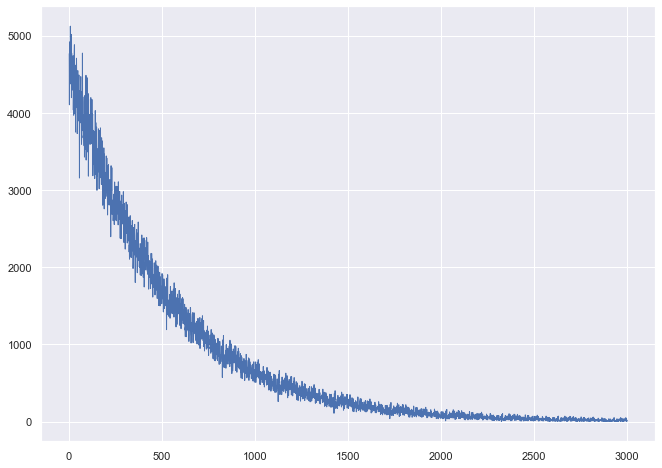

In [309]:
plt.plot(range(1, len(sgd.error_)+1), sgd.error_, linewidth=1);

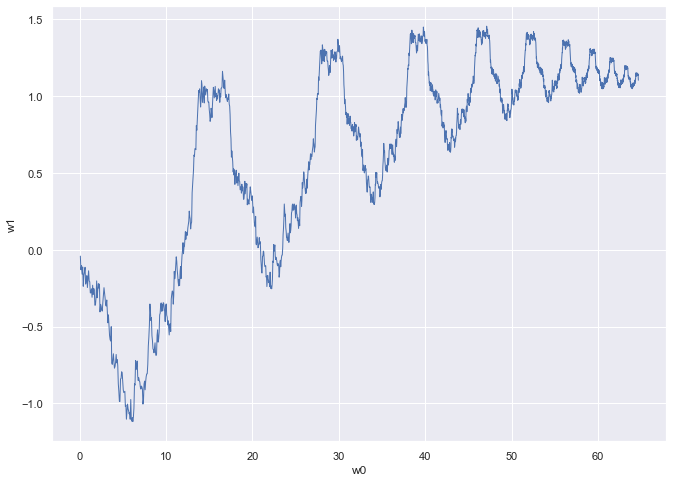

In [310]:
plt.plot(np.array(sgd.weights_).T.tolist()[0], np.array(sgd.weights_).T.tolist()[1], linewidth=1)
plt.xlabel('w0')
plt.ylabel('w1');

In [312]:
%%time
sgd = SGDRegressor(quiet=True)
sgd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, sgd.predict(X_valid_scaled))

Wall time: 1.76 s


2.6758568913046146

In [313]:
%%time
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, lr.predict(X_valid_scaled))

Wall time: 3 ms


2.670830767667635

In [314]:
%%time
from sklearn.linear_model import SGDRegressor as _SGDRegressor
_sgd = _SGDRegressor()
_sgd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, _sgd.predict(X_valid_scaled))

Wall time: 108 ms


2.6713431717764657

In [315]:
%%time
sgd = SGDRegressor(eta=10**-4, quiet=True)
sgd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, sgd.predict(X_valid_scaled))

Wall time: 1.52 s


2.6708213323421774